In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
df = pd.read_csv(r'C:\Users\asus\Desktop\Assignment\data_set.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [33]:
#dropping Loan_ID column as it does not provide much info.
df = df.drop(['Loan_ID'], axis=1)

In [5]:
#checking missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Gender 0.0212  % missing values
Married 0.0049  % missing values
Dependents 0.0244  % missing values
Self_Employed 0.0521  % missing values
LoanAmount 0.0358  % missing values
Loan_Amount_Term 0.0228  % missing values
Credit_History 0.0814  % missing values


In [13]:
features_with_na

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [16]:
#changing target variable to numeric value
df['Loan_Approved'] = pd.get_dummies(df['Loan_Status'],drop_first=True)

In [17]:
df = df.drop(['Loan_Status'], axis=1)

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [20]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  6


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved
0,5849,0.0,NaN,360.0,1.0,1
1,4583,1508.0,128.0,360.0,1.0,0
2,3000,0.0,66.0,360.0,1.0,1
3,2583,2358.0,120.0,360.0,1.0,1
4,6000,0.0,141.0,360.0,1.0,1


In [21]:
#dicrete numerical feature refers to numerical features which contain less unique values.
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 3


In [22]:
discrete_feature

['Loan_Amount_Term', 'Credit_History', 'Loan_Approved']

In [23]:
df[discrete_feature].head()

,Loan_Amount_Term,Credit_History,Loan_Approved
0,360.0,1.0,1
1,360.0,1.0,0
2,360.0,1.0,1
3,360.0,1.0,1
4,360.0,1.0,1


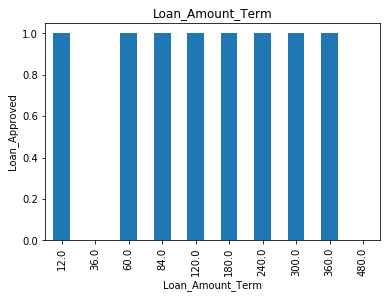

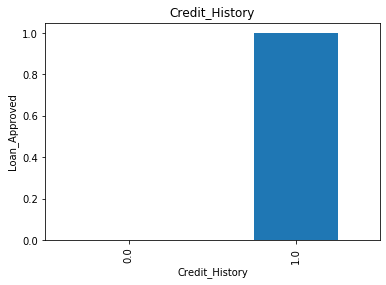

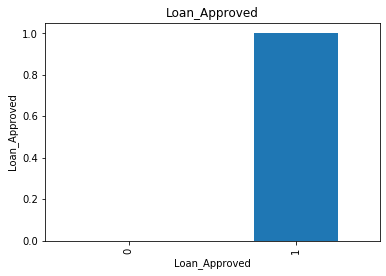

In [24]:
for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['Loan_Approved'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Loan_Approved')
    plt.title(feature)
    plt.show()

In [25]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 3


In [26]:
continuous_feature

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

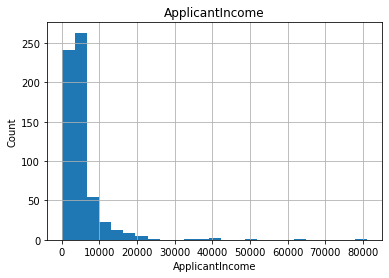

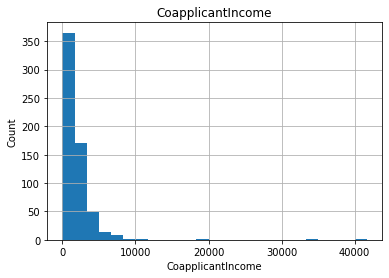

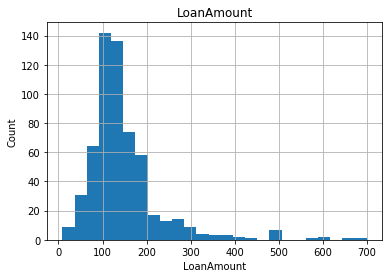

In [27]:
#checking if the distribution is normal or not
for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

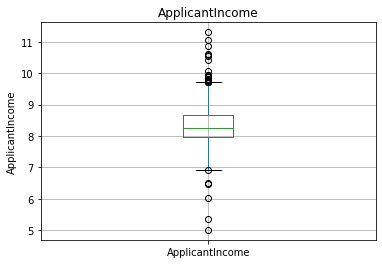

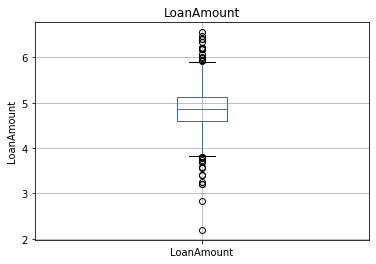

In [28]:
#looking for outliers using boxplots
for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [35]:
#categorical features
categorical_features=[feature for feature in df.columns if data[feature].dtypes=='O']
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [36]:
df[categorical_features].head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,Male,No,0,Graduate,No,Urban
1,Male,Yes,1,Graduate,No,Rural
2,Male,Yes,0,Graduate,Yes,Urban
3,Male,Yes,0,Not Graduate,No,Urban
4,Male,No,0,Graduate,No,Urban


In [37]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Gender and number of categories are 3
The feature is Married and number of categories are 3
The feature is Dependents and number of categories are 5
The feature is Education and number of categories are 2
The feature is Self_Employed and number of categories are 3
The feature is Property_Area and number of categories are 3


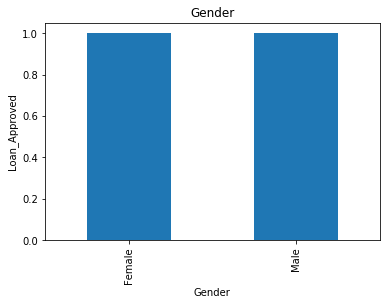

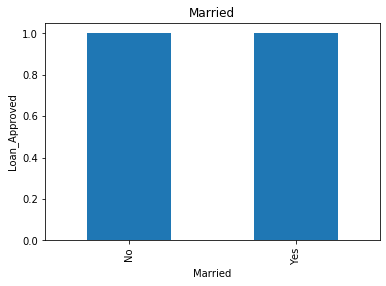

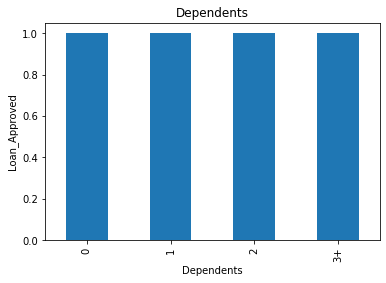

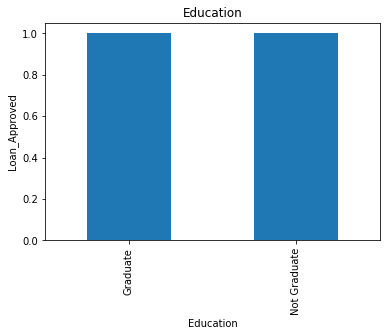

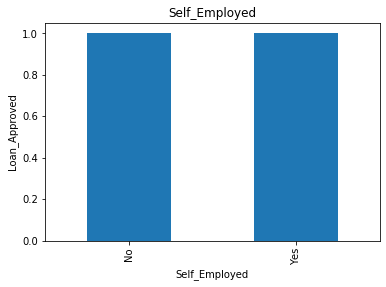

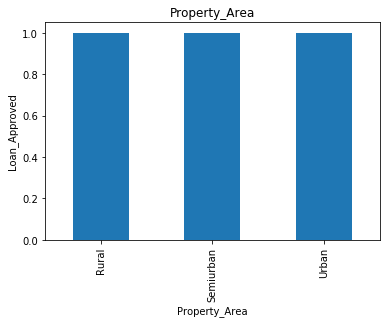

In [38]:
#visualising categorical features
for feature in categorical_features:
    data=df.copy()
    data.groupby(feature)['Loan_Approved'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Loan_Approved')
    plt.title(feature)
    plt.show()

In [39]:
#categorical features with missing values
features_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(df[feature].isnull().mean(),4)))

Gender: 0.0212% missing values
Married: 0.0049% missing values
Dependents: 0.0244% missing values
Self_Employed: 0.0521% missing values


In [40]:
features_nan

['Gender', 'Married', 'Dependents', 'Self_Employed']

In [41]:
data = df.copy()

In [42]:
#filling missing values using mode of the data
from statistics import mode
data["Gender"] = data['Gender'].fillna(mode(data["Gender"]))

In [43]:
data["Married"] = data['Married'].fillna(mode(data["Married"]))
data["Dependents"] = data['Dependents'].fillna(mode(data["Dependents"]))
data["Education"] = data['Education'].fillna(mode(data["Education"]))
data["Self_Employed"] = data['Self_Employed'].fillna(mode(data["Self_Employed"]))

In [44]:
data = pd.get_dummies(data, columns = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Property_Area','Education'], drop_first=True)

In [45]:
data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,1,0
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,1,0


In [46]:
df = data.copy()

In [47]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate
0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,1,0
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,1,0


In [48]:
#numerical features with missing values
numerical_with_nan=[feature for feature in df.columns if df[feature].isnull().sum()>1 and df[feature].dtypes!='O']
for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(df[feature].isnull().mean(),4)))

LoanAmount: 0.0358% missing value
Loan_Amount_Term: 0.0228% missing value
Credit_History: 0.0814% missing value


In [49]:
for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=df[feature].median()
    
    ## create a new feature to capture nan values
    df[feature+'nan']=np.where(df[feature].isnull(),1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numerical_with_nan].isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
dtype: int64

In [50]:
df.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Loan_Approved              0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Education_Not Graduate     0
LoanAmountnan              0
Loan_Amount_Termnan        0
Credit_Historynan          0
dtype: int64

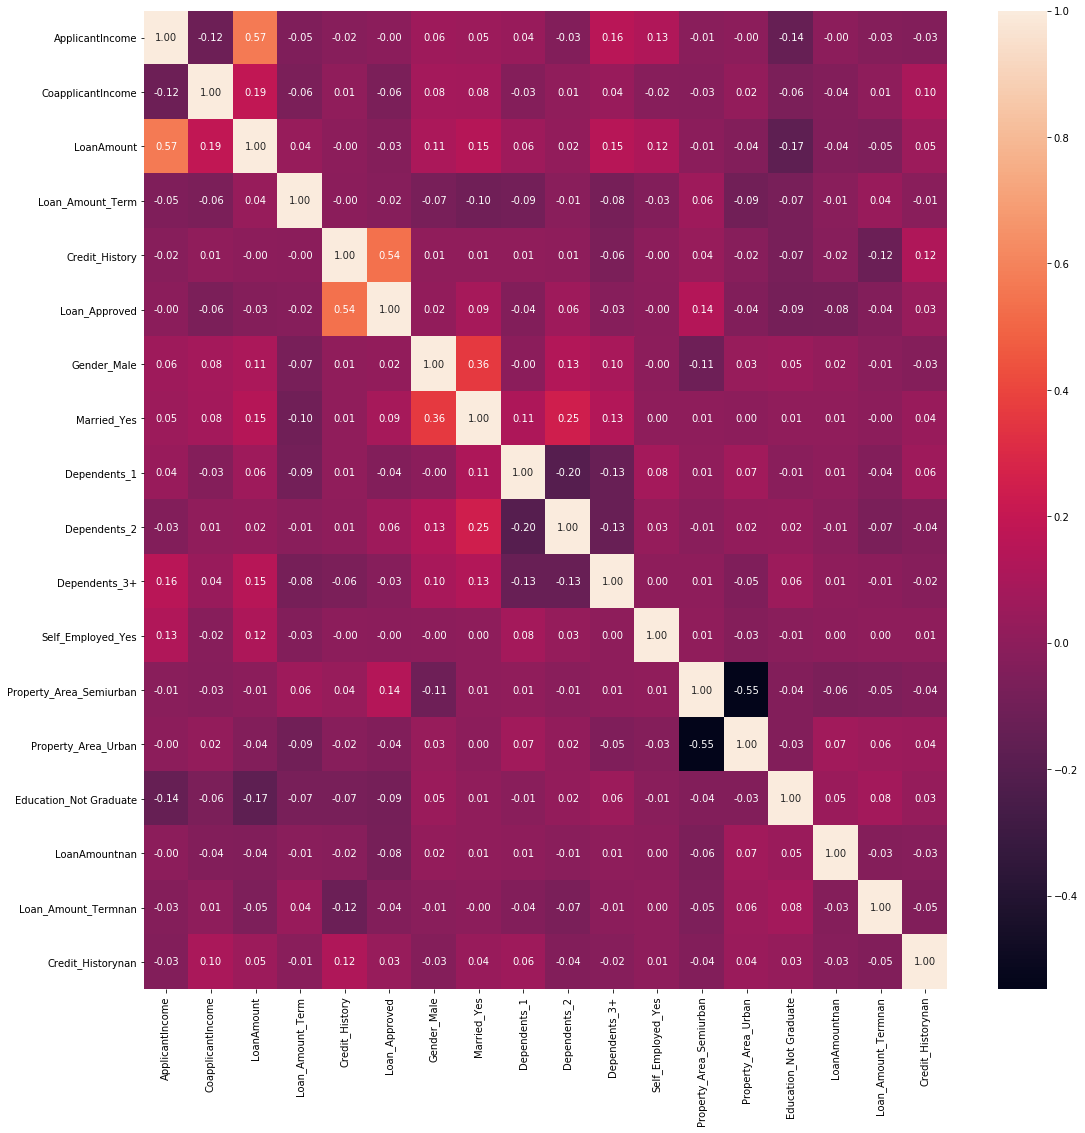

In [51]:
#checking correlation between features
f,ax = plt.subplots(figsize = (18,18)) 
sns.heatmap(df.corr(), annot=True, fmt = '0.2f')

In [52]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Education_Not Graduate,LoanAmountnan,Loan_Amount_Termnan,Credit_Historynan
0,5849,0.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0,1,0,0
1,4583,1508.0,128.0,360.0,1.0,0,1,1,1,0,0,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,1,0,0,0,1,0,1,0,0,0,0
3,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,0,0,0,1,1,0,0,0
4,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,1,0,0,0,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,1,1,1,1,0,0,0,0,1,0,0,0,0
612,7583,0.0,187.0,360.0,1.0,1,1,1,0,1,0,0,0,1,0,0,0,0


In [53]:
#scaling the data as there are data present with different dimensions
data = df.copy()
feature_scale=[feature for feature in data.columns if feature not in ['Loan_Approved']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [54]:
scaler.transform(data[feature_scale])

array([[0.07048856, 0.        , 0.17221418, ..., 1.        , 0.        ,
        0.        ],
       [0.05482993, 0.03619171, 0.17221418, ..., 0.        , 0.        ,
        0.        ],
       [0.03525046, 0.        , 0.08248915, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.09798392, 0.00575995, 0.35311143, ..., 0.        , 0.        ,
        0.        ],
       [0.09193568, 0.        , 0.25759768, ..., 0.        , 0.        ,
        0.        ],
       [0.05482993, 0.        , 0.17945007, ..., 0.        , 0.        ,
        0.        ]])

In [55]:
data = pd.concat([data[['Loan_Approved']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [56]:
df = data.copy()

In [57]:
#splitting test and train data
from sklearn.model_selection import train_test_split
y = df['Loan_Approved']
X = df.drop(['Loan_Approved'], axis=1)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
model = RandomForestClassifier(n_estimators=140, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [126]:
model.score(X_test, y_test)

0.8211382113821138

In [128]:
y_pred = model.predict(X_test)

In [129]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ', accuracy_score(y_test, y_pred))

Accuracy Score:  0.8211382113821138


In [130]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16, 17],
       [ 5, 85]], dtype=int64)

In [131]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.48      0.59        33
           1       0.83      0.94      0.89        90

    accuracy                           0.82       123
   macro avg       0.80      0.71      0.74       123
weighted avg       0.81      0.82      0.81       123



In [132]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1], dtype=uint8)